In [25]:
% some housekeeping stuff
register_graphics_toolkit ("gnuplot");
available_graphics_toolkits ();
graphics_toolkit ("gnuplot")
clear
% load packages
pkg load statistics
% end of housekeeping

# Modelling

 - what does modelling mean in science?
 - consider the scientific method, the first step is experimental observations
 - the next step is to fit these observations to a mathematical model
 - this is modelling! and we can derive scientific laws
 - the third step in the scientific method is a theory (ie, KMT to explain gas laws)
 - so in measurements we fix one or more variables and measure one or more variables
 - for now consider one independent variable ($x$) and one dependent variable ($y$)
 
 ### one-parameter model
 
 - so if we have some function $y=f(x)$ then the constants in $f(x)$ are called parameters
 - finding values for these parameters that make our calculated data look like the actual data (in a statistical sense) is how modelling is done
 - best to understand with an example, and we'll start with a one parameter model
 - dispersion of an aersol vs. time.  Measure dispersion as the reciprocal of the number of particles in a unit volume
 - form of the model $y=\beta x$
 - but have to add the error $y=\beta x + \epsilon$

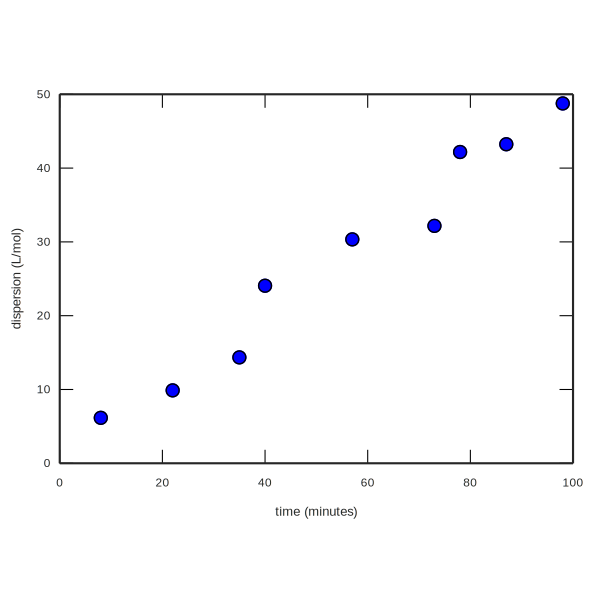

In [26]:
time=[8 22 35 40 57 73 78 87 98];
dispersion=[6.16 9.88 14.35 24.06 30.34 32.17 42.18 43.23 48.76];
plot(time,dispersion,'ko','markersize',4,'markerfacecolor','b')
set(gca,'fontsize',11,'linewidth',2)
xlabel('time (minutes)'); ylabel('dispersion (L/mol)')

### assumptions of least-squares

 - we are going to do ``least-squares'' but in order to do this method we need to assume ...
1. errors are random for each data point
2. errors have zero mean
3. errors have constant variance
4. errors are independent
 -  given these assumptions the statistically best estimate for $\beta$ is given by the ``best-fit'' model that comes closest to the data in the sense of minimizing the quantity ...
	$$ S=\sum_{u=1}^{n}(y_{obs,u}-y_{calc,u})^2 $$

where $n$ is the number of measurements  

### visual method

 - we want the value of $\beta$ that minimizes $S$
 - $$ S(\beta)=\sum(y-\beta x)^2 $$
 - so let's plot $S$ as a function of $\beta$ for fixed values of $\beta$
 - plotting an visual inspection would work to find the best $\beta$ value but the value can be calculated directly



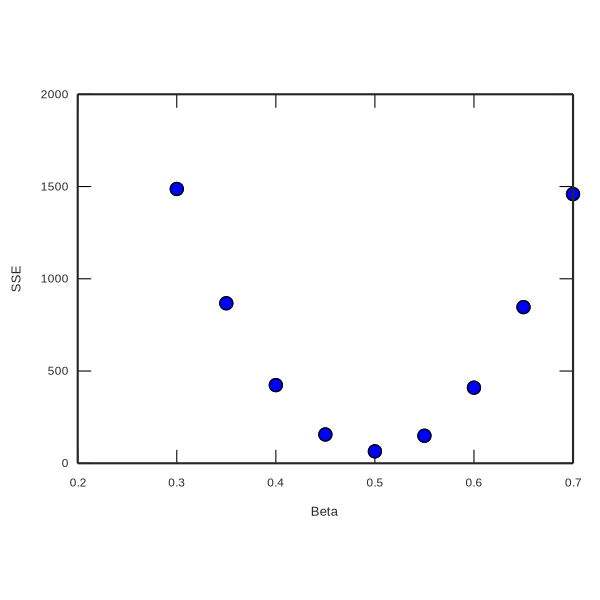

In [27]:
%plot -s 600,600 -f 'svg'

beta=0.3:0.05:0.7;

S=zeros(size(beta));

for i=1:length(beta)
	for j=1:length(time)
		S(i)=S(i)+(dispersion(j)-beta(i)*time(j))^2;
	end
end


plot(beta,S,'ko','markersize',4,'markerfacecolor','b') 
set(gca,'fontsize',11,'linewidth',2)
xlabel('\Beta'); ylabel('SSE')
	

### calculate best-fit in least-squares sense

 - important to note: there is a unique value in linear regression, this is not true for nonlinear regression
 - so let's calculate the ``exact'' value for $\beta$
 - the quantity $y_{obs}-y_{calc}$ is a vector of <b>residuals</b>
 - this residual vector is orthogonal to the vector of $x$ values
 - this means that the dot product is zero or that the sum of each residual value times each $x$ value is zero
 - $$ \sum(y_{obs}-\beta x)x = 0 $$
 - $$ \beta=\dfrac{\sum(y_{obs}x)}{\sum x^2} $$
 - with the data here $\beta=\dfrac{17 638}{35 208}=0.501$
 - so we can plot the data and the model

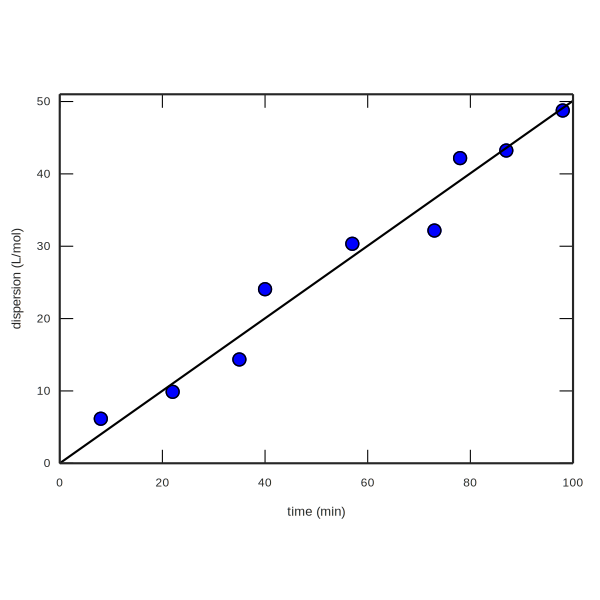

In [28]:
%plot -s 600,600 -f 'svg'

timeplot=0:0.1:100;
model=timeplot*0.501;
plot(time,dispersion,'ko','markersize',4,'markerfacecolor','b')
hold on
plot(timeplot,model,'k-','linewidth',2)
set(gca,'fontsize',11,'linewidth',2)
xlabel('time (min)'); ylabel('dispersion (L/mol)')
axis([0 100 0 51])


### confidence in parameter estimate

 - we assumed constant variance in the experimental noise
 - we can get an estimate of sigma from the sum of squares at the optimal estimate of $\beta$
 - in this case $S_R=64.6602$
 - the equation is \begin{equation*} s^2=\dfrac{S_R}{\nu} \end{equation*}
 - where $\nu$ is the degrees of freedom = num. of obs. - num. of parameters
 - here $\nu=9-1=8$ so $s^2=8.0837$ and $s=2.8432$
 - use the formula to calculate standard error ($SE$)
 - \begin{equation*} SE=\sqrt{\dfrac{s^2}{\sum_{u=1}^{n}x_u^2}}=\sqrt{\dfrac{8.0837}{35 208}}=\sqrt{0.0002296}=0.015 \end{equation*}
 - to get a confidence interval look up student's t with $n-1=8$ degrees of freedom and $1-\alpha$ confidence interval
 - for 95\% $\beta \pm [t_{\alpha/2} \times SE]$
 -  so $0.501 \pm [2.306 \times 0.015]=0.501 \pm 0.035$
 - finally, never forget to check the residuals

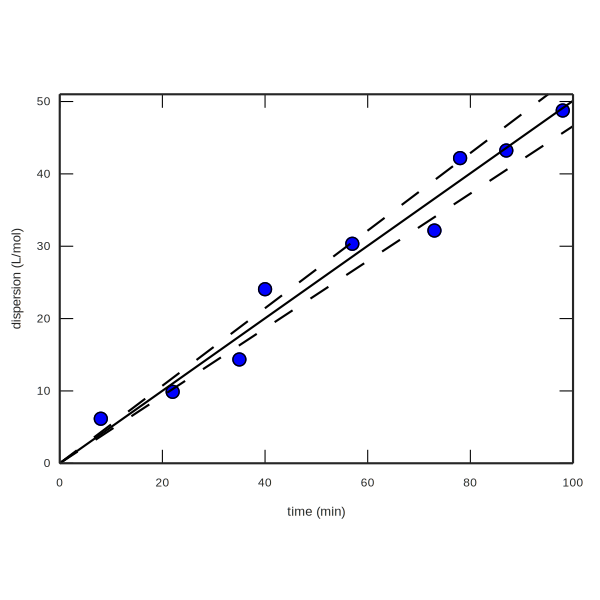

In [29]:
%plot -s 600,600 -f 'svg'

timeplot=0:0.1:100;
model=timeplot*0.501;
modellow=timeplot*(0.501-0.035);
modelhigh=timeplot*(0.501+0.035);
plot(time,dispersion,'ko','markersize',4,'markerfacecolor','b')
hold on
plot(timeplot,model,'k-','linewidth',2)
plot(timeplot,modellow,'k--','linewidth',2)
plot(timeplot,modelhigh,'k--','linewidth',2)
set(gca,'fontsize',11,'linewidth',2)
xlabel('time (min)'); ylabel('dispersion (L/mol)')
axis([0 100 0 51])

Absorbance =

        0   0.4000   0.8000   1.6000   2.0000



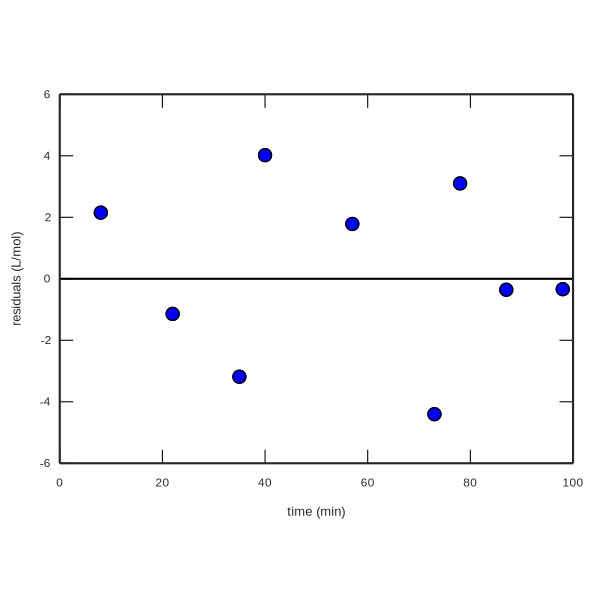

In [30]:
%plot -s 600,600 -f 'svg'

model=time*0.501;
residuals=dispersion-model;
plot(time,residuals,'ko','markersize',4,'markerfacecolor','b')
set(gca,'fontsize',11,'linewidth',2)
xlabel('time (min)'); ylabel('residuals (L/mol)')
hold on
plot([0 100],[0 0],'k','linewidth',2)
%axis([0 100 0 51])

concentration=[0 1 2 4 5];
Absorbance=0.4*concentration 

# Exercise 3

for the Beer's law calibration determine the slope and uncertainty in the slope estimation. Include a plot of the calibration curve with model line.

| Concentration (ppm) | Absorbance|
| --- | --- | 
| 0 | 0 |
| 1 | 0.41 |
| 2 | 0.78 |
| 4 | 1.64 |
| 5 | 1.98 |


# models of the form y=mx+b (two parameters)

 -  usually we also want to determine an intercept parameter
 - consider the data (welding example from Box and Hunter and Hunter)
 
 | velocity (ft/minute) | breaking strength (ksi)|
| --- | --- | 
| 2 | 89 |
| 2.5 | 97 |
| 2.5 | 91 |
| 2.75 | 98 |
| 3 | 100 |
| 3 | 104 |
| 3 | 97 |
 
 - start by estimating the two parameters graphically.  plot SSE versus both slope and intercept estimates simultaneously



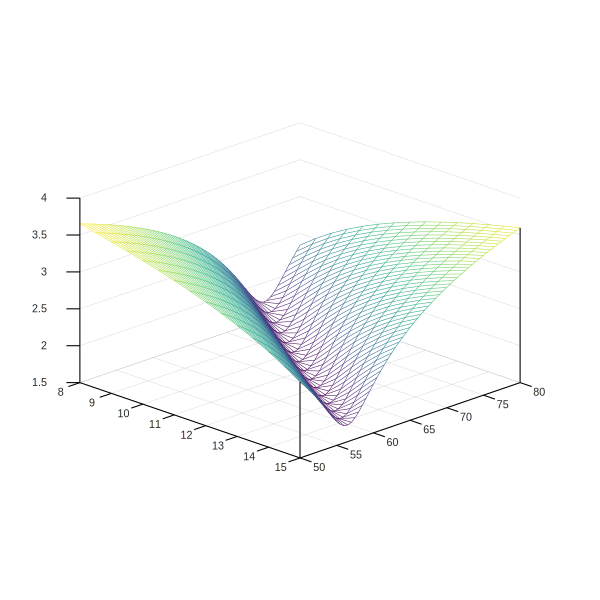

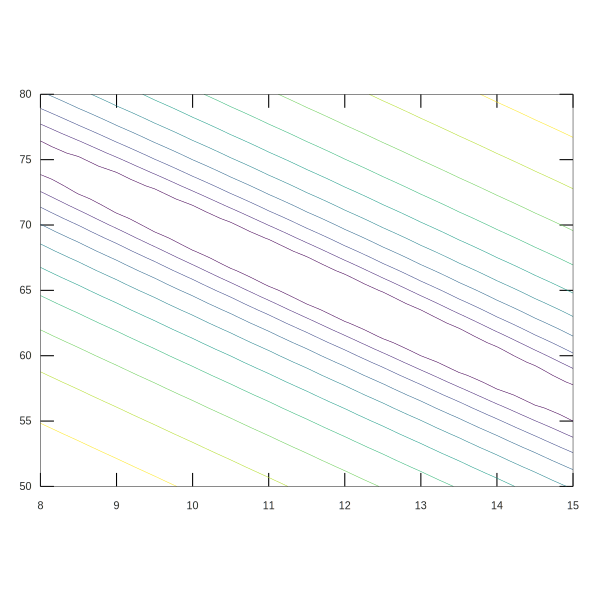

In [31]:
%plot -s 600,600 -f 'svg'

x=[2 2.5 2.5 2.75 3 3 3];
y=[89 97 91 98 100 104 97];

slopes=8:0.5:15; intercepts=50:0.5:80;

for i=1:length(slopes)
    for j=1:length(intercepts)
        model=slopes(i)*x+intercepts(j); residuals=y-model;
        SSE(j,i)=sum(residuals.^2);
    end
end

figure(1)
contour(slopes,intercepts,log10(SSE),10)

figure(2)
mesh(slopes,intercepts,log10(SSE))
view([45 30]); 

### exact solution

 - for a two parameter model ($y=\beta 1x1+\beta 2x2$) there are two normal equations
 -  $\sum(y_{obs}-y_{calc})x1$ and $\sum(y_{obs}-y_{calc})x2$
 -  $\sum(y_{obs}-\beta 1x1-\beta 2x2)x1$ and $\sum(y_{obs}-\beta 1x1 -\beta 2x2)x2$
 -  $\sum(yx1)-\beta 1\sum(x1^2)-\beta 2\sum(x1x2)$ and $\sum(yx2)-\beta 1\sum(x1x2)-\beta 2\sum(x2^2)$
 -  if we write $[ij]$ for $\sum(x_{ij})$ and $[yi]$ for $\sum(yx_i)$
	
	$$[11]\beta 1 + [12]\beta 2 = [y1]$$
	$$[12]\beta 1 + [22]\beta 2 = [y2]$$
    
 - in matrix form
	$$
			\begin{bmatrix}
			[11]& [12]\\
			[12]& [22]
			\end{bmatrix}
			\begin{bmatrix}
			\beta 1\\ \beta 2
			\end{bmatrix}
			=
			\begin{bmatrix}
			y1 \\ y2
			\end{bmatrix}
$$
 - and we could solve this using matrix division
 - if we say $\mathbf{M b}=\mathbf{P}$ then $\mathbf{b}=\mathbf{P}/\mathbf{M}$ or $\mathbf{b}=\mathbf{M}^{-1}\mathbf{P}$
 - if we identify how $\mathbf{M}$, and $\mathbf{P}$ can be made from the original data we 
wont have to calc all thes $[11]$, $[12]$, $y1$ ... terms

 - we can see that $\mathbf{M}$ can be calculated as a matrix of $x$ values times its transpose
	$$
			\begin{bmatrix}
			[11]& [12]\\
			[12]& [22]
			\end{bmatrix}
			=
			\begin{bmatrix}
			x1 \\ x2
			\end{bmatrix}
			\begin{bmatrix}
			x1 & x2
			\end{bmatrix}
		$$
        
 - and $\mathbf{P}$ can be calculated as a matrix of $x$ values times its the $y$ values
	$$
			\begin{bmatrix}
			[y1]\\ [y2]\\
			\end{bmatrix}
			=
			\begin{bmatrix}
			x1 \\ x2
			\end{bmatrix}
			\begin{bmatrix}
			y 
			\end{bmatrix}
		$$
 - so if we define $\mathbf{X}$ as a matrix of $x$ values with each set of $x$'s in columns and we define $y$ as a column vector of measured responses
 - then the column vector of parameters $\mathbf{b}$ is given by ...
 - $$ \mathbf{b}=[\mathbf{X}^\prime\mathbf{X}]^{-1}X^\prime y $$
 -  that the dimensions work if we have two variables ($x1$ and $x2$) one response ($y$) and 10 measurements
 - <b>write program to calc the $\mathbf{b}$ vector in this way</b>
    


b =

   65.340
   11.660



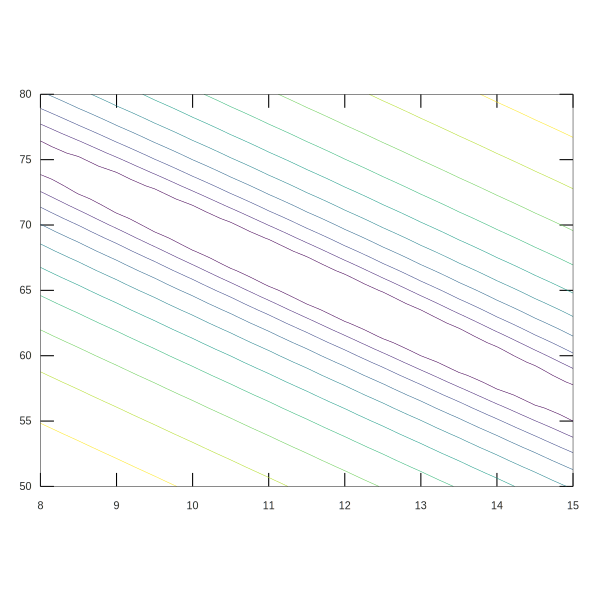

In [32]:
%plot -s 600,600 -f 'svg'
X=[ones(size(x')) x']; 
y=y';
b=inv(X'*X)*X'*y

contour(slopes,intercepts,log10(SSE),10)

hold on
plot(b(1),b(2),'+','markersize',5)


### confidence intervals about parameter estimates and regression line

 - whenever we estimate paramters we need to know how good the estimate is
 - also we need to know how good the prediction of data using this model
 - for linear models, if all the assumptions (random, uncorrelated, constant variance errors) are satisfied then these confidence intervals about parameter estimates and predicted lines are well-defined
 - this is not true for non-linear models
 - <b>{1-$\alpha$ joint confidence region}</b> for $\mathbf{\beta}$ is the ellipsoid contour line $\leq Ps^2F(P;N-P;\alpha)$
 - where $s^2=\dfrac{S(\mathbf{\beta})}{N-P}$ for $N$ measurements and $P$ parameters and ${S(\mathbf{\beta})}$ is the sum of squares at the best-fit value
 - also $F(P;N-P;\alpha)$ is looked up on statistical tables
 -  <b>{1-$\alpha$ marginal confidence intervals} </b> for $\beta_p$ is given by $\beta_p \pm se(\beta_p)t(N-P;\alpha/2)$
 - where $se(\beta_p) = s\sqrt{[(\mathbf{X}^{T}\mathbf{X})^{-1}]_{pp}}$ where the subscript $pp$ indicates the $p$th diagonal term in the $(\mathbf{X}^{T}\mathbf{X})^{-1}$ matrix
 
 - below I will calculate these three quantities.  Using recipes from "Nonlinear Regression Analysis and it's applications" by Bates and Watts.


s = 2.9535


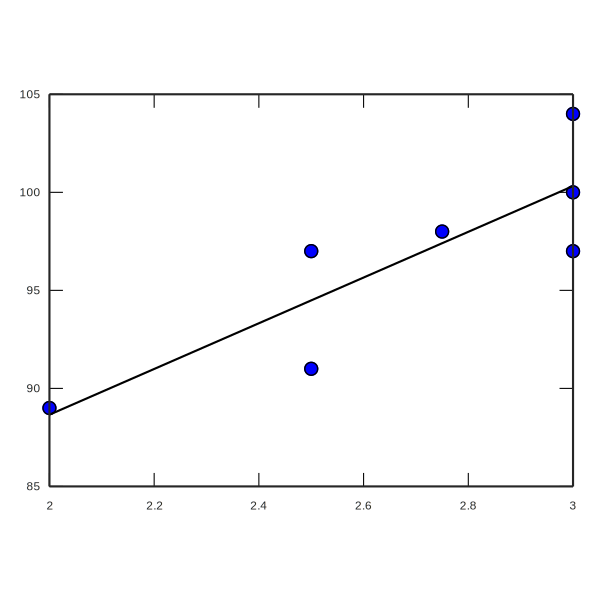

In [33]:
%plot -s 600,600 -f 'svg'
% linear regression

P=2; % two parameters
N=length(x); %number of observatrions
nu=N-P; % degrees of freedom.  no. obs-no.parameters
bestmodel=X*b;
s2=sum((bestmodel-y).^2)./nu; s=sqrt(s2)

plot(x,y,'ko','markersize',4,'markerfacecolor','b')
set(gca,'linewidth',2,'fontsize',11)
hold on
plot(x,bestmodel,'k','linewidth',2)


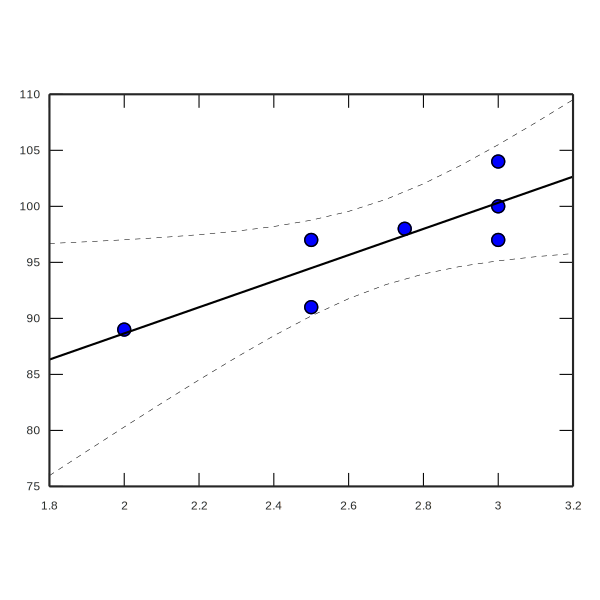

In [34]:
%plot -s 600,600 -f 'svg'

% 1-alpha condidence band for the response function for any x ------

Fvalue=finv(0.95,P,N-P);
xplot=1.8:0.1:3.2; xplot=xplot';
XPLOT=[ones(size(xplot)) xplot];
model=XPLOT*b;

plot(x,y,'ko','markersize',4,'markerfacecolor','b')
set(gca,'linewidth',2,'fontsize',11)
hold on

plot(xplot,model,'k','linewidth',2)

for i=1:length(xplot)
	xh=[1; xplot(i)];
	upper(i)=xh'*b+s*sqrt(xh'*inv(X'*X)*xh)*sqrt(P*Fvalue);
	lower(i)=xh'*b-s*sqrt(xh'*inv(X'*X)*xh)*sqrt(P*Fvalue);
end

plot(xplot,upper,'k--')
plot(xplot,lower,'k--')


In [35]:
% confidence intervals on parameter estimates

tvalue=tinv(0.975,length(x)-P);
seB=s*sqrt(diag(inv(X'*X)))*tvalue;
params=[b-seB b+seB]


params =

   42.9573   87.7236
    3.3722   19.9470



ans = 79
invR1 =

  -0.3780   2.9238
        0  -1.0916



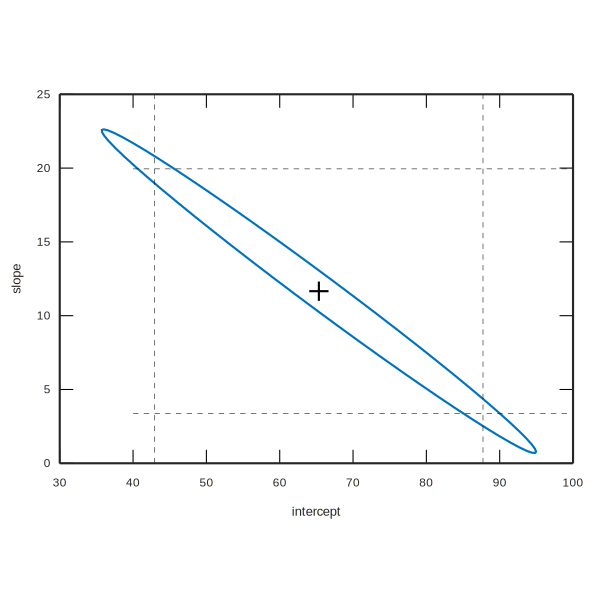

In [36]:
%plot -s 600,600 -f 'svg'
% contour of joint confidence interval. the ellipsoid

w=0:0.1:2.5*pi; % for plotting the elippse
length(w)

[Q,R]=qr(X); R1 = R(1:2,1:2); invR1=inv(R1)

for i=1:length(w)
	    scalar=sqrt(P*s2*Fvalue);
        BETA(:,i)=b+scalar*invR1*([cos(w(i)); sin(w(i))]);
    end

plot(BETA(1,:),BETA(2,:),'linewidth',2)
set(gca,'fontsize',11,'linewidth',2)
xlabel('intercept'); ylabel('slope')

xlowlim=40; xhighlim=100;
ylowlim=0; yhighlim=25;
hold on;
plot([params(1,1) params(1,1)],[ylowlim yhighlim],'k--')
plot([params(1,2) params(1,2)],[ylowlim yhighlim],'k--')
plot([xlowlim xhighlim],[params(2,1) params(2,1)],'k--')
plot([xlowlim xhighlim],[params(2,2) params(2,2)],'k--')
plot([b(1)],b(2),'k+')



# exercise 4


Determine the best-fit model and 3 measures of confidence for the following data ...
 
 | age (years) | [PCB] ppb |
 | --- | --- | 
 |  1  |   0.6 | 
 |     1  |   1.6 | 
 |    1  |   0.5 | 
 |    1  |   1.2 | 
 |    2  |   2.0 | 
 |    2  |   1.3 | 
 |    2   |  2.5 | 
 |    3  |   2.2 | 
 |     3  |   2.4 | 
 |    3  |   1.2 | 
 |    4  |   3.5 | 
 |    4  |   4.1 | 
 |   4  |   5.1 | 
 |    5  |   5.7 | 
 |    6  |   3.4 | 
 |    6 |    9.7 | 
 |    6  |   8.6 | 
 |   7  |   4.0 | 
 |    7  |   5.5 | 
 |     7  |   10.5 | 
 |     8  |   17.5 |   
 | 8  |   13.4 | 
 | 8  |   4.5 | 
 | 9  |   30.4 | 
 | 11  |  12.4 | 
 | 12  |  13.4 | 
 | 12 |   26.2 | 
 | 12  |  7.4 | 

note you need to use the cube root of the age and the natural logarithm of the PCB concentration to formulate a linear model.